# <b> Customer Sentiment Analysis-British Airway Airline </b>

## <b>Project Overview</b>
Every review tells a story — and this project set out to uncover what British Airways passengers are *really* feeling.  
Using **Natural Language Processing (NLP)** techniques, I analyzed thousands of customer reviews to classify them as **positive**, **neutral**, or **negative**, revealing how travelers perceive their overall experience.  

The analysis combined **text sentiment scoring**, **word frequency visualization**, and **trend interpretation** to extract key themes around comfort, delays, customer service, and punctuality.  
By visualizing these insights, the project provides a clear, data-driven picture of passenger satisfaction and pain points.


## <b>Project Purpose </b>
The purpose of this project is to transform raw customer feedback into **actionable insights** that can improve service delivery and enhance the passenger experience.  
By examining emotional tones, review length, and context-specific issues (like flight delays or staff interactions), the goal is to help British Airways — or any airline — understand what drives customer satisfaction or frustration.


## <b>Project Objectives</b>
1. **Classify Sentiment** – Determine whether each review expresses a positive, negative, or neutral tone using NLP sentiment scoring.  
2. **Visualize Patterns** – Generate visual insights such as sentiment distribution, word clouds, and relationships between review length and sentiment intensity.  
3. **Identify Key Themes** – Detect recurring topics such as delays, cancellations, and customer service quality.  
4. **Correlate Causes with Emotions** – Understand how factors like weather, crew performance, or technical issues influence customer sentiment.  
5. **Provide Actionable Insights** – Summarize findings that can guide airlines in improving communication, reliability, and service consistency.


<h2><b>Scrape Data with BeautifulSoup</b></h2>

In [1]:
#import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 
page_size = 100 

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


<h2><b>Load Data in DataFrame</b></h2>

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Very good service on this rout...
1,✅ Trip Verified | Flight mainly let down by ...
2,✅ Trip Verified | Another awful experience b...
3,"✅ Trip Verified | The service was rude, full..."
4,✅ Trip Verified | This flight was a joke. Th...


In [4]:
df.to_csv("BA_reviews.csv") #save data to a new csv file

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df #display dataset


,reviews
0,Not Verified | Very good service on this rout...
1,✅ Trip Verified | Flight mainly let down by ...
2,✅ Trip Verified | Another awful experience b...
3,"✅ Trip Verified | The service was rude, full..."
4,✅ Trip Verified | This flight was a joke. Th...
...,...
995,✅ Trip Verified | Orlando to Gatwick. Terribl...
996,✅ Trip Verified | Mahe to Stockholm via London...
997,✅ Trip Verified | Glasgow to Tampa via Gatwic...
998,Not Verified | Orlando to Gatwick. Travelling...


<h2><b>Data Cleaning</b></h2>

In [6]:
import re #import regular expressions

data = pd.read_csv("BA_reviews.csv") #load saved data
data.head()

,Unnamed: 0,reviews
0,0,Not Verified | Very good service on this rout...
1,1,✅ Trip Verified | Flight mainly let down by ...
2,2,✅ Trip Verified | Another awful experience b...
3,3,"✅ Trip Verified | The service was rude, full..."
4,4,✅ Trip Verified | This flight was a joke. Th...


In [7]:
clean_data = data['reviews'].str.replace(r"(✅ Trip Verified \| |Not Verified \| )", "", regex=True) #remove unnecessay words using string method replace with regular expression




In [8]:
clean_data2 = data['reviews'].str.replace(r"(✅ Trip Verified \| |Not Verified \|)", "", regex=True) #remove unnecessay words using string method replace with regular expression
clean_data2

0        Very good service on this route BA2710 30th ...
1        Flight mainly let down by a disagreeable fli...
2        Another awful experience by British Airways....
3        The service was rude, full of attitude to me...
4        This flight was a joke. There was four peopl...
                             ...                        
995     Orlando to Gatwick. Terrible flight experienc...
996    Mahe to Stockholm via London. Checked in onlin...
997     Glasgow to Tampa via Gatwick. Early morning f...
998      Orlando to Gatwick. Travelling home was extr...
999     London to Abu Dhabi. This is the daytime flig...
Name: reviews, Length: 1000, dtype: object

In [9]:
clean_data2 = clean_data2.str.strip() #remove white spaces at the beginning and ending

In [10]:
clean_data2.head()

0    Very good service on this route BA2710 30th Ma...
1    Flight mainly let down by a disagreeable fligh...
2    Another awful experience by British Airways. T...
3    The service was rude, full of attitude to me, ...
4    This flight was a joke. There was four people ...
Name: reviews, dtype: object

In [11]:
clean_data2.to_csv('BA_NewReviews') #save clean data

In [2]:
import pandas as pd

# Read file as plain text, one review per line
with open(r"C:\Users\HP\Desktop\British\BA_NewReviews.csv", encoding="utf-8") as f:
    reviews = f.read().splitlines()

# Put into a DataFrame
df = pd.DataFrame(reviews, columns=["reviews"])

print(df.head())
print(df.shape)


                                             reviews
0                                           ,reviews
1  0,"Very good service on this route BA2710 30th...
2  1,"Flight mainly let down by a disagreeable fl...
3  2,Another awful experience by British Airways....
4  3,"The service was rude, full of attitude to m...
(1004, 1)


In [3]:
df.head() #display clean data

,reviews
0,",reviews"
1,"0,""Very good service on this route BA2710 30th..."
2,"1,""Flight mainly let down by a disagreeable fl..."
3,"2,Another awful experience by British Airways...."
4,"3,""The service was rude, full of attitude to m..."


In [22]:
!pip install textblob  


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   -------------------------------------- 624.3/624.3 kB 603.8 kB/s eta 0:00:00


<b><h1>Sentiment Analysis with TextBlob</h1></b>

In [4]:
from textblob import TextBlob

df["sentiment"] = df["reviews"].apply(lambda x: TextBlob(x).sentiment.polarity) #generate sentiment scores
print(df[["reviews", "sentiment"]]) #display sentiment score alongside reviews

                                                reviews  sentiment
0                                              ,reviews   0.000000
1     0,"Very good service on this route BA2710 30th...  -0.120648
2     1,"Flight mainly let down by a disagreeable fl...   0.207461
3     2,Another awful experience by British Airways....  -0.320000
4     3,"The service was rude, full of attitude to m...  -0.045833
...                                                 ...        ...
999   995,"Orlando to Gatwick. Terrible flight exper...  -0.316667
1000  996,"Mahe to Stockholm via London. Checked in ...   0.035714
1001  997,"Glasgow to Tampa via Gatwick. Early morni...   0.272614
1002  998,"Orlando to Gatwick. Travelling home was e...  -0.191528
1003  999,"London to Abu Dhabi. This is the daytime ...   0.365729

[1004 rows x 2 columns]


In [5]:
df.to_csv("british_airways_sentiment.csv", index=False)


In [6]:
highest = df.loc[df["sentiment"].idxmax()]
print(highest)


reviews      927,Gatwick to St Lucia. Great service on this...
sentiment                                                0.715
Name: 931, dtype: object


<h2><b>Sentiment Segmentation</b></h2>

In [7]:
# Categorize Sentiment with Strong and Weak Positives & Negatives
df["sentiment_label"] = df["sentiment"].apply(
    lambda x: "Strong Positive" if x >= 0.5 
    else ("Weak Positive" if 0 < x < 0.5 
    else ("Weak Negative" if -0.5 <= x < 0 
    else ("Strong Negative" if x < -0.5 
    else "Neutral")))
)

In [8]:
df.head()

,reviews,sentiment,sentiment_label
0,",reviews",0.000000,Neutral
1,"0,""Very good service on this route BA2710 30th...",-0.120648,Weak Negative
2,"1,""Flight mainly let down by a disagreeable fl...",0.207461,Weak Positive
3,"2,Another awful experience by British Airways....",-0.320000,Weak Negative
4,"3,""The service was rude, full of attitude to m...",-0.045833,Weak Negative


In [9]:
df.to_csv("british_airways_sentiment_label.csv", index=False)

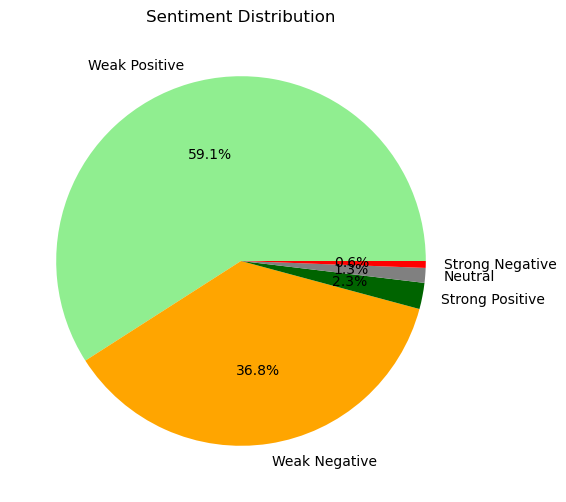

In [24]:
import matplotlib.pyplot as plt
# Categorize Sentiment with Strong and Weak Positives & Negatives
df["sentiment_label"] = df["sentiment"].apply(
    lambda x: "Strong Positive" if x >= 0.5 
    else ("Weak Positive" if 0 < x < 0.5 
    else ("Weak Negative" if -0.5 <= x < 0 
    else ("Strong Negative" if x < -0.5 
    else "Neutral")))
)

# Count sentiment categories
sentiment_counts = df["sentiment_label"].value_counts()

# Define colors for each category
colors = {
    "Strong Positive": "darkgreen",
    "Weak Positive": "lightgreen",
    "Neutral": "gray",
    "Weak Negative": "orange",
    "Strong Negative": "red"
}

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", 
        colors=[colors[label] for label in sentiment_counts.index])
plt.title("Sentiment Distribution")
plt.show()


!pip install wordcloud #install wordcloud for themes visualization


<h2><b>Topic Modelling</b></h2>

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd


# Vectorize the reviews (ignoring stop words)
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['reviews'])

# Apply LDA to discover topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Set n_components to the number of topics you want
lda.fit(X)

#Display top words per topic
words = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"\nTopic {i + 1}:")
    print([words[j] for j in topic.argsort()[-10:]])

#Assign topics to reviews (Optional: Add this step to see which topic each review belongs to)
df['topic'] = lda.transform(X).argmax(axis=1)

# Step 5: Analyze sentiment by topic
topic_sentiment = df.groupby('topic')['sentiment'].mean()
print("\nAverage Sentiment by Topic:")
print(topic_sentiment)



Topic 1:
['time', 'good', 'club', 'food', 'staff', 'boarding', 'service', 'crew', 'flight', 'ba']

Topic 2:
['luggage', 'delayed', 'airline', 'heathrow', 'flights', 'ba', 'london', 'british', 'airways', 'flight']

Topic 3:
['good', 'flight', 'food', 'service', 'economy', 'seats', 'seat', 'ba', 'business', 'class']

Topic 4:
['food', 'service', 'passengers', 'check', 'staff', 'cabin', 'good', 'time', 'crew', 'flight']

Topic 5:
['airport', 'cancelled', 'airways', 'british', 'hours', 'service', 'told', 'customer', 'ba', 'flight']

Average Sentiment by Topic:
topic
0    0.185308
1    0.055355
2    0.063388
3    0.122316
4   -0.025223
Name: sentiment, dtype: float64


<h2><b>Investigating Causes of Delayed/Cancelled Flight</b></h2>

In [14]:
topic_sentiment.to_csv("topic_sentment.csv", index=False)

In [15]:
# Keywords related to cancellation, delay, and disruptions
interruptions_keywords = ["cancelled", "delayed", "missed", "rescheduled", "flight change", "late", "hours", "told"]

# Filter reviews that mention any service interruption (e.g., cancellation, delay)
interruptions_reviews = df[df['reviews'].apply(lambda x: any(keyword.lower() in x.lower() for keyword in interruptions_keywords))]

# Calculate sentiment for interrupted reviews
interruptions_reviews['sentiment'] = interruptions_reviews['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Example: Analyzing the sentiment distribution for interrupted reviews
print("\nReviews with Interruptions (Cancellation/Delays) and Sentiment Scores:")
print(interruptions_reviews[['reviews', 'sentiment']].head())

# Investigating the specific mention of customer service in interrupted reviews
customer_service_keywords = ["customer service", "help", "staff", "service", "support", "representative", "assistance"]

# Filter reviews that mention customer service in the context of interruptions
interruptions_with_service = interruptions_reviews[interruptions_reviews['reviews'].apply(lambda x: any(keyword.lower() in x.lower() for keyword in customer_service_keywords))]

# Sentiment analysis for reviews mentioning customer service during interruptions
interruptions_with_service['service_sentiment'] = interruptions_with_service['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Example: Analyzing the sentiment for reviews mentioning customer service during interruptions
print("\nReviews with Interruptions and Mentions of Customer Service:")
print(interruptions_with_service[['reviews', 'sentiment', 'service_sentiment']].head())

# Identify possible causes of cancellations (weather, technical issues, staffing)
cause_keywords = ["weather", "technical", "staffing", "maintenance", "mechanical", "crew", "weather conditions", "technical issues"]

# Create a function to filter reviews based on cause keywords
def filter_by_cause(review, keywords):
    return any(keyword.lower() in review.lower() for keyword in keywords)

# Filter reviews based on possible causes
interruptions_with_causes = interruptions_reviews[interruptions_reviews['reviews'].apply(lambda x: filter_by_cause(x, cause_keywords))]

# Sentiment analysis for interruptions mentioning specific causes
interruptions_with_causes['cause_sentiment'] = interruptions_with_causes['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Example: Analyzing reviews that mention specific causes of cancellations (e.g., technical, staffing)
print("\nReviews with Interruptions and Specific Causes (Weather, Technical, Staffing):")
print(interruptions_with_causes[['reviews', 'sentiment', 'cause_sentiment']].head())

# Count the frequency of each cause in reviews
cause_counts = interruptions_with_causes['reviews'].apply(lambda x: [cause for cause in cause_keywords if cause.lower() in x.lower()]).explode().value_counts()

# Display the most frequent causes of cancellations or delays
print("\nMost Common Causes of Cancellations/Delays in Reviews:")
print(cause_counts)


C:\Users\HP\AppData\Local\Temp\ipykernel_15384\2605437515.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interruptions_reviews['sentiment'] = interruptions_reviews['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)



Reviews with Interruptions (Cancellation/Delays) and Sentiment Scores:
                                             reviews  sentiment
2  1,"Flight mainly let down by a disagreeable fl...   0.207461
3  2,Another awful experience by British Airways....  -0.320000
7  6,"The seats were excellent, with a feel of mu...   0.357407
8  7,"After the nightmare of getting through trip...   0.051178
9  8,Prior to boarding a gate agent seemed to pic...  -0.080827


C:\Users\HP\AppData\Local\Temp\ipykernel_15384\2605437515.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interruptions_with_service['service_sentiment'] = interruptions_with_service['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)



Reviews with Interruptions and Mentions of Customer Service:
                                              reviews  sentiment  \
2   1,"Flight mainly let down by a disagreeable fl...   0.207461   
3   2,Another awful experience by British Airways....  -0.320000   
8   7,"After the nightmare of getting through trip...   0.051178   
9   8,Prior to boarding a gate agent seemed to pic...  -0.080827   
10  9,"I flew from Amsterdam to Las Vegas with a l...   0.037584   

    service_sentiment  
2            0.207461  
3           -0.320000  
8            0.051178  
9           -0.080827  
10           0.037584  

Reviews with Interruptions and Specific Causes (Weather, Technical, Staffing):
                                              reviews  sentiment  \
8   7,"After the nightmare of getting through trip...   0.051178   
9   8,Prior to boarding a gate agent seemed to pic...  -0.080827   
10  9,"I flew from Amsterdam to Las Vegas with a l...   0.037584   
16  15,An hour's delay due to lat

C:\Users\HP\AppData\Local\Temp\ipykernel_15384\2605437515.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interruptions_with_causes['cause_sentiment'] = interruptions_with_causes['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [16]:
import pandas as pd
from textblob import TextBlob

# Keywords related to cancellation, delay, and disruptions
interruptions_keywords = ["cancelled", "delayed", "missed", "rescheduled", "flight change", "late", "hours", "told"]

# Filter reviews that mention any service interruption
interruptions_reviews = df[df['reviews'].apply(lambda x: any(keyword.lower() in x.lower() for keyword in interruptions_keywords))].copy()

# Calculate sentiment for interrupted reviews
interruptions_reviews['sentiment'] = interruptions_reviews['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Save interruptions reviews with sentiment to CSV
interruptions_reviews[['reviews', 'sentiment']].to_csv("interruptions_reviews.csv", index=False)

# Customer service keywords
customer_service_keywords = ["customer service", "help", "staff", "service", "support", "representative", "assistance"]

# Filter reviews mentioning customer service
interruptions_with_service = interruptions_reviews[interruptions_reviews['reviews'].apply(lambda x: any(keyword.lower() in x.lower() for keyword in customer_service_keywords))].copy()

# Sentiment analysis for customer service mentions
interruptions_with_service['service_sentiment'] = interruptions_with_service['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Save to CSV
interruptions_with_service[['reviews', 'sentiment', 'service_sentiment']].to_csv("interruptions_with_service.csv", index=False)

# Cause keywords
cause_keywords = ["weather", "technical", "staffing", "maintenance", "mechanical", "crew", "weather conditions", "technical issues"]

# Filter by causes
def filter_by_cause(review, keywords):
    return any(keyword.lower() in review.lower() for keyword in keywords)

interruptions_with_causes = interruptions_reviews[interruptions_reviews['reviews'].apply(lambda x: filter_by_cause(x, cause_keywords))].copy()

# Sentiment analysis for causes
interruptions_with_causes['cause_sentiment'] = interruptions_with_causes['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Save to CSV
interruptions_with_causes[['reviews', 'sentiment', 'cause_sentiment']].to_csv("interruptions_with_causes.csv", index=False)

# Count frequency of each cause
cause_counts = interruptions_with_causes['reviews'].apply(lambda x: [cause for cause in cause_keywords if cause.lower() in x.lower()]).explode().value_counts()

# Save cause counts to CSV
cause_counts.to_csv("cause_counts.csv", header=['count'])


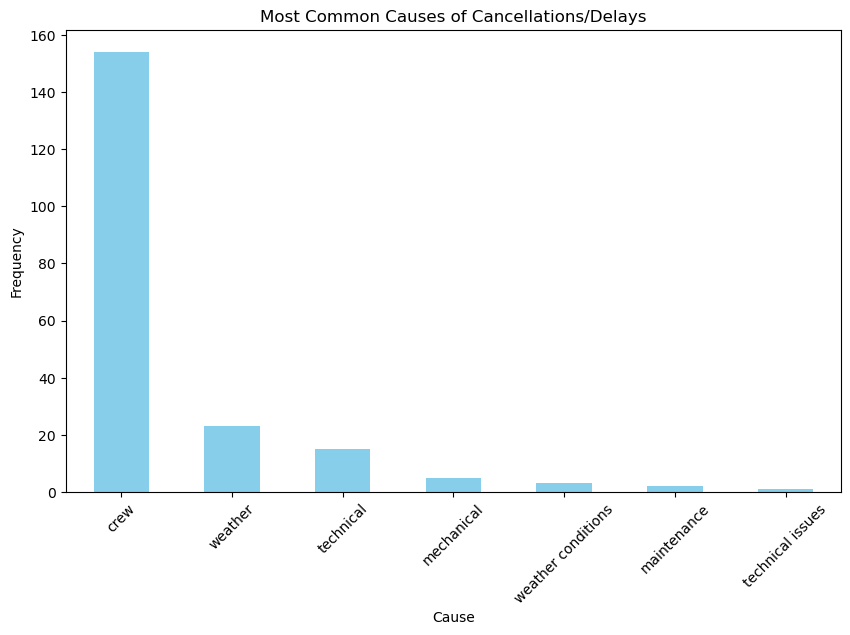

In [28]:
import matplotlib.pyplot as plt

# Plot the frequency of different causes
plt.figure(figsize=(10,6))
cause_counts.plot(kind='bar', color='skyblue')
plt.title("Most Common Causes of Cancellations/Delays")
plt.xlabel("Cause")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


<h2><b>Top Common Words in Sentiment Segmentation</b></h2>

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Define a function to get the most common words in each sentiment category
def get_top_words(df, sentiment_label, n=10):
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)  # Ignore common words
    filtered_reviews = df[df["sentiment_label"] == sentiment_label]["reviews"]
    
    if filtered_reviews.empty:
        return []
    
    X = vectorizer.fit_transform(filtered_reviews)
    word_counts = X.toarray().sum(axis=0)
    
    word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_words[:n]

# Get top 10 words for each sentiment category
for sentiment in df["sentiment_label"].unique():
    print(f"\nTop words in {sentiment} reviews:")
    print(get_top_words(df, sentiment))



Top words in Weak Negative reviews:
[('flight', 680), ('ba', 454), ('service', 267), ('british', 186), ('airways', 179), ('class', 170), ('london', 169), ('hours', 164), ('seat', 164), ('business', 155)]

Top words in Weak Positive reviews:
[('flight', 1300), ('ba', 892), ('service', 457), ('time', 403), ('good', 370), ('crew', 338), ('food', 300), ('london', 283), ('cabin', 273), ('seat', 268)]

Top words in Strong Negative reviews:
[('flight', 6), ('terrible', 5), ('food', 4), ('service', 4), ('horrible', 3), ('boarding', 2), ('connecting', 2), ('delayed', 2), ('flights', 2), ('london', 2)]

Top words in Strong Positive reviews:
[('flight', 26), ('good', 17), ('food', 16), ('ba', 14), ('excellent', 13), ('crew', 12), ('great', 12), ('service', 11), ('cabin', 9), ('seat', 8)]

Top words in Neutral reviews:
[('flight', 14), ('ba', 7), ('seat', 7), ('luggage', 6), ('london', 5), ('service', 5), ('airways', 4), ('british', 4), ('changed', 4), ('customer', 4)]


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Define function to get top words
def get_top_words(df, sentiment_label, n=10):
    vectorizer = CountVectorizer(stop_words='english', max_features=1000)
    filtered_reviews = df[df["sentiment_label"] == sentiment_label]["reviews"]
    
    if filtered_reviews.empty:
        return []
    
    X = vectorizer.fit_transform(filtered_reviews)
    word_counts = X.toarray().sum(axis=0)
    
    word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))
    sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)
    
    return sorted_words[:n]

# Collect all top words into a list
top_words_data = []

for sentiment in df["sentiment_label"].unique():
    top_words = get_top_words(df, sentiment)
    for word, count in top_words:
        top_words_data.append({
            "sentiment": sentiment,
            "word": word,
            "count": count
        })

# Convert to DataFrame
top_words_df = pd.DataFrame(top_words_data)

# Save to CSV
top_words_df.to_csv("top_words_by_sentiment.csv", index=False)

print("Top words saved to 'top_words_by_sentiment.csv'.")


Top words saved to 'top_words_by_sentiment.csv'.


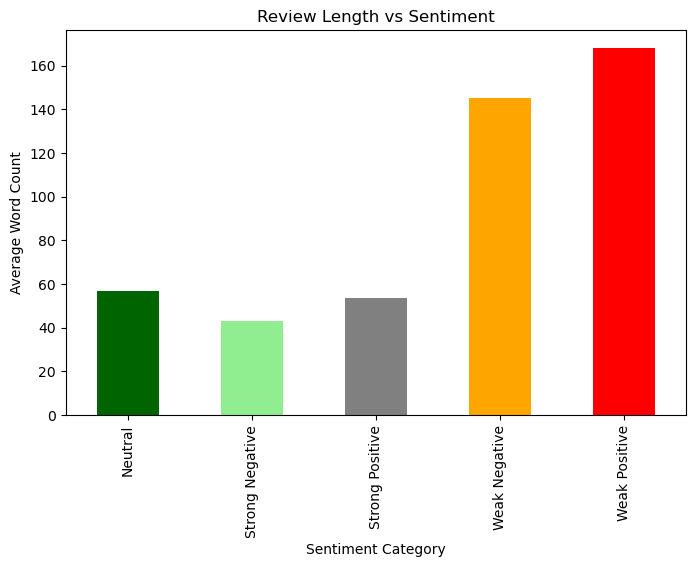

In [18]:
import matplotlib.pyplot as plt

# Add a column for review length (word count)
df["review_length"] = df["reviews"].apply(lambda x: len(x.split()))

# Compute average review length per sentiment
avg_review_length = df.groupby("sentiment_label")["review_length"].mean()

# Plot review length distribution by sentiment
plt.figure(figsize=(8, 5))
avg_review_length.plot(kind="bar", color=["darkgreen", "lightgreen", "gray", "orange", "red"])
plt.ylabel("Average Word Count")
plt.xlabel("Sentiment Category")
plt.title("Review Length vs Sentiment")
plt.show()


<h2><b>Sentiment Intensity Distribution</b></h2>

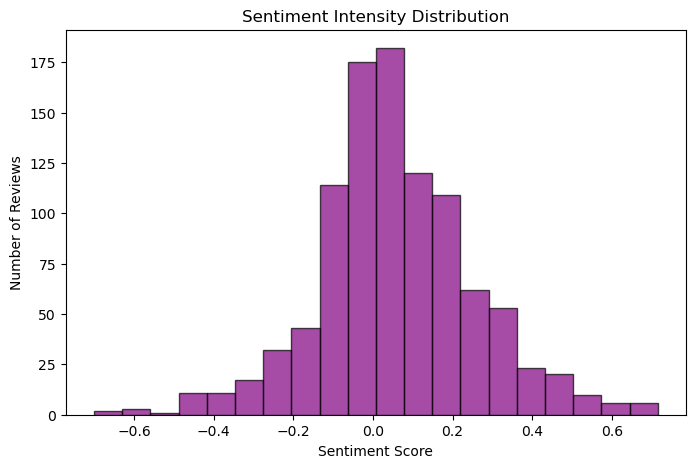

In [19]:
# Plot histogram of sentiment scores
plt.figure(figsize=(8, 5))
plt.hist(df["sentiment"], bins=20, color="purple", alpha=0.7, edgecolor="black")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Intensity Distribution")
plt.show()


<h2><b>Influential Words in Sentiment Analysis</b></h2>

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=20)  # Extract top 20 influential words
X_tfidf = tfidf.fit_transform(df["reviews"])

# Get top influential words
feature_names = tfidf.get_feature_names_out()
tfidf_scores = X_tfidf.toarray().sum(axis=0)

# Sort words by importance
word_importance = sorted(zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)

# Print top 10 influential words
print("\nTop 10 Influential Words in Sentiment Analysis:")
for word, score in word_importance[:10]:
    print(f"{word}: {score:.2f}")



Top 10 Influential Words in Sentiment Analysis:
flight: 274.89
ba: 216.99
service: 140.59
time: 116.78
london: 110.74
crew: 110.12
food: 106.80
good: 102.72
british: 98.76
seat: 97.34


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Apply TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=20)  # Top 20 influential words
X_tfidf = tfidf.fit_transform(df["reviews"])

# Get feature names and scores
feature_names = tfidf.get_feature_names_out()
tfidf_scores = X_tfidf.toarray().sum(axis=0)

# Sort words by importance
word_importance = sorted(zip(feature_names, tfidf_scores), key=lambda x: x[1], reverse=True)

# Create a DataFrame for export
tfidf_df = pd.DataFrame(word_importance, columns=["word", "score"])

# Save to CSV
tfidf_df.to_csv("top_tfidf_words.csv", index=False)

print("Top TF-IDF words saved to 'top_tfidf_words.csv'.")


Top TF-IDF words saved to 'top_tfidf_words.csv'.


<h2><b>Aspect Based Sentiment</b></h2>

In [22]:
# Define keywords for each aspect (touchpoint)
aspects = {
    "Check-in": ["check-in", "check in", "registration", "boarding pass"],
    "Boarding": ["boarding", "gate", "boarding process", "boarding time"],
    "Flight Experience": ["comfort", "seat", "legroom", "food", "flight experience", "in-flight service"],
    "Customer Service": ["customer service", "staff", "crew", "service", "helpful", "polite"]
}

# Function to detect aspect in review
def get_aspect_sentiment(review, aspects):
    aspect_sentiment = {}
    
    for aspect, keywords in aspects.items():
        # Check if any of the keywords are in the review
        if any(keyword.lower() in review.lower() for keyword in keywords):
            sentiment = TextBlob(review).sentiment.polarity  # Apply sentiment analysis
            aspect_sentiment[aspect] = sentiment
            
    return aspect_sentiment

# Apply the function to your reviews dataset
df['aspect_sentiments'] = df['reviews'].apply(lambda x: get_aspect_sentiment(x, aspects))

# Example: Checking the sentiment scores for the first few reviews
print(df[['reviews', 'aspect_sentiments']].head())


                                             reviews  \
0  Very good service on this route BA2710 30th Ma...   
1  Flight mainly let down by a disagreeable fligh...   
2  Another awful experience by British Airways. T...   
3  The service was rude, full of attitude to me, ...   
4  This flight was a joke. There was four people ...   

                                   aspect_sentiments  
0         {'Customer Service': -0.12064814814814816}  
1  {'Check-in': 0.2074609733700643, 'Boarding': 0...  
2         {'Customer Service': -0.31999999999999995}  
3  {'Flight Experience': -0.045833333333333344, '...  
4                        {'Customer Service': -0.45}  


In [19]:
import pandas as pd
from textblob import TextBlob

# Define keywords for each aspect (touchpoint)
aspects = {
    "Check-in": ["check-in", "check in", "registration", "boarding pass"],
    "Boarding": ["boarding", "gate", "boarding process", "boarding time"],
    "Flight Experience": ["comfort", "seat", "legroom", "food", "flight experience", "in-flight service"],
    "Customer Service": ["customer service", "staff", "crew", "service", "helpful", "polite"]
}

# Function to detect aspect in review
def get_aspect_sentiment(review, aspects):
    aspect_sentiment = {}
    for aspect, keywords in aspects.items():
        if any(keyword.lower() in review.lower() for keyword in keywords):
            sentiment = TextBlob(review).sentiment.polarity
            aspect_sentiment[aspect] = sentiment
    return aspect_sentiment

# Apply the function
df['aspect_sentiments'] = df['reviews'].apply(lambda x: get_aspect_sentiment(x, aspects))

# Expand the aspect_sentiments dict into separate columns
aspect_df = df['aspect_sentiments'].apply(pd.Series)

# Combine with original reviews
output_df = pd.concat([df[['reviews']], aspect_df], axis=1)

# Save to CSV
output_df.to_csv("aspect_sentiment_reviews.csv", index=False)

print("Aspect-level sentiment analysis saved to 'aspect_sentiment_reviews.csv'.")


Aspect-level sentiment analysis saved to 'aspect_sentiment_reviews.csv'.


<h2><b>Word Cloud</b></h2>

In [21]:
!pip install wordcloud

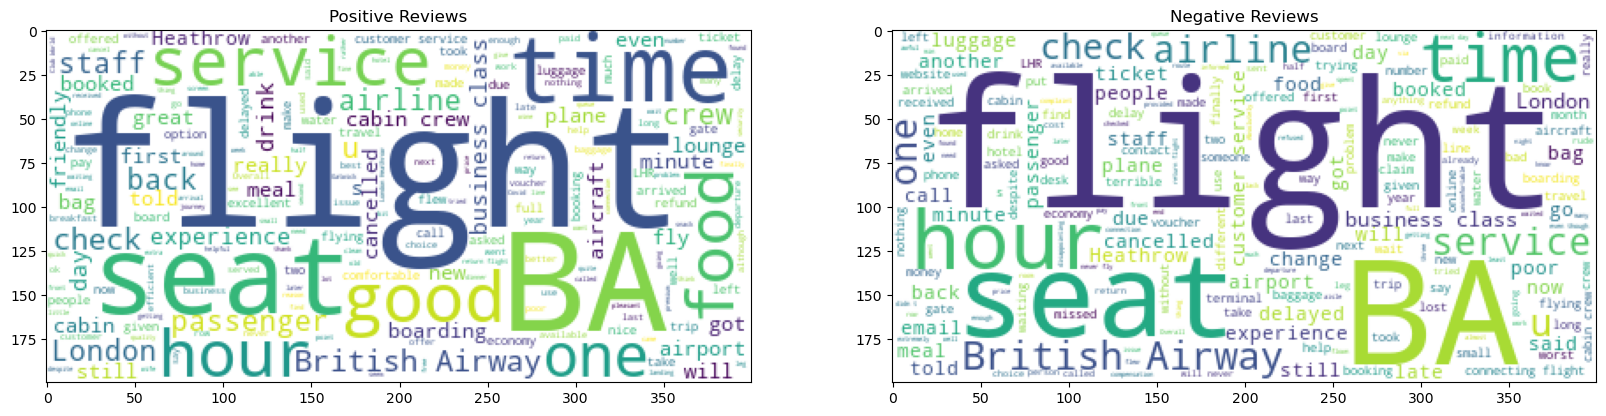

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = " ".join(df[df["sentiment"] > 0]["reviews"])
negative_text = " ".join(df[df["sentiment"] < 0]["reviews"])

plt.figure(figsize=(20,15))

plt.subplot(1,2,1)
plt.imshow(WordCloud(background_color="white").generate(positive_text))
plt.title("Positive Reviews")

plt.subplot(1,2,2)
plt.imshow(WordCloud(background_color="white").generate(negative_text))
plt.title("Negative Reviews")

plt.show()


## 

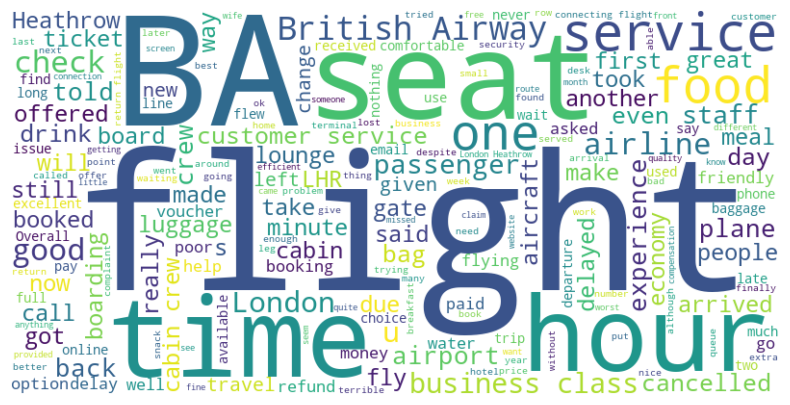

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text into one string
text = " ".join(df["reviews"])

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


!pip install gensim nltk
